# Bollinger Band Buy and Sell Signal Plot

## Import Packages 

In [1]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import yfinance as yf # download historical market data from Yahoo! finance

## Load data from Yahoo Finance API by using yfinance

In [2]:
data = yf.download("^GSPC", period = "max").reset_index()
data

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23236,2020-07-06,3155.290039,3182.590088,3155.290039,3179.719971,3179.719971,4736450000
23237,2020-07-07,3166.439941,3184.149902,3142.929932,3145.320068,3145.320068,4563700000
23238,2020-07-08,3153.070068,3171.800049,3136.530029,3169.939941,3169.939941,4927700000
23239,2020-07-09,3176.169922,3179.780029,3115.699951,3152.050049,3152.050049,4829020000


In [3]:
#Set timeframe from min_time to max_time, number of days and standard deviations to use for rolling lookback period for Bollinger band calculation
def prepare_data(data,min_time,max_time,window=21,no_of_std = 2):
    df=data.set_index('Date')[min_time:max_time]
    #Calculate rolling mean and standard deviation using number of days set above
    rolling_mean = df['Close'].rolling(window).mean()
    rolling_std = df['Close'].rolling(window).std()

    #create two new DataFrame columns to hold values of upper and lower Bollinger bands
    df['Rolling Mean'] = rolling_mean
    df['UpperB'] = rolling_mean + (rolling_std * no_of_std)
    df['LowerB'] = rolling_mean - (rolling_std * no_of_std)
    df['PercentB']=(df['Close']-df['LowerB'])/(df['UpperB']-df['LowerB'])
    return df

In [4]:
def percentB_belowzero(percentB,price):
    signal   = []
    previous = -1.0
    for date,value in percentB.iteritems():
        if value < 0 and previous >= 0:
            signal.append(price[date]*0.99)
        else:
            signal.append(np.nan)
        previous = value
    return signal

In [5]:
def percentB_aboveone(percentB,price):
    signal   = []
    previous = 2
    for date,value in percentB.iteritems():
        if value > 1 and previous <= 1:
            signal.append(price[date]*1.01)
        else:
            signal.append(np.nan)
        previous = value
    return signal

In [6]:
def signal_plot(df):
    tcdf = df[['LowerB','UpperB']]  # DataFrame with LowerB and UpperB
    low_signal  = percentB_belowzero(df['PercentB'], df['Close']) 
    high_signal = percentB_aboveone(df['PercentB'], df['Close'])
    apds = [ mpf.make_addplot(tcdf,linestyle='dashdot'),
             mpf.make_addplot(low_signal,type='scatter',markersize=200,marker='^'),
             mpf.make_addplot(high_signal,type='scatter',markersize=200,marker='v'),
             mpf.make_addplot((df['PercentB']),panel=1,color='g',linestyle='dotted')
           ]

    mpf.plot(df,addplot=apds,figscale=1.2,volume=True,style='yahoo')

## Create Buy and Sell Signal Plot for 2019 S&P 500 data

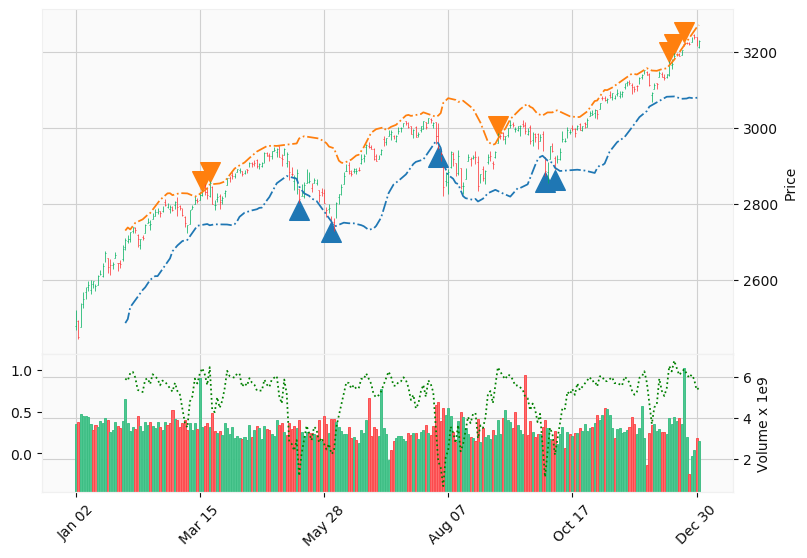

In [7]:
# Set timeframe from 2019-01-01 to 2019-12-31, window size = 21, and number of standard deviations = 2
df=prepare_data(data,'2019-01-01','2019-12-31',window=21,no_of_std = 2)
signal_plot(df)

## Create Buy and Sell Signal Plot for 2020 S&P 500 data

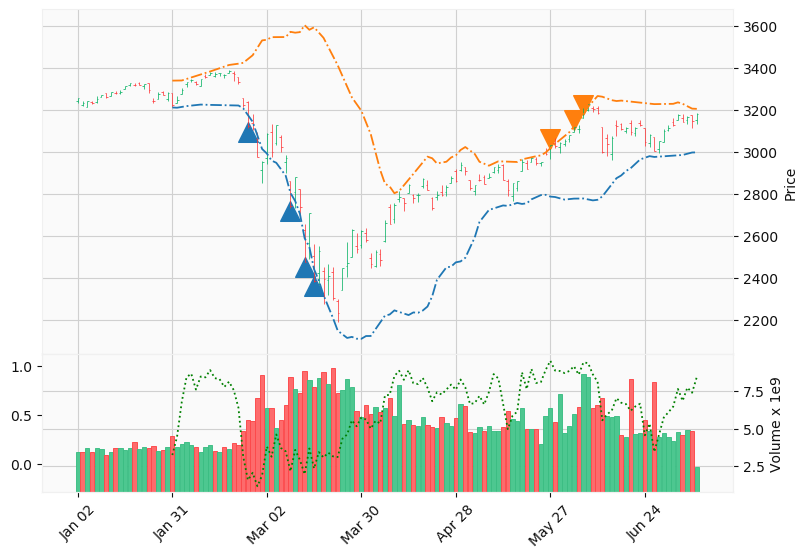

In [8]:
df=prepare_data(data,'2020-01-01','2020-07-10',window=21,no_of_std = 2)
signal_plot(df)